In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
path="/content/drive/MyDrive/Spectromorph_Assignment_1-20250617T184740Z-1-001.zip"
import zipfile
extract_to = "/content/emoji_dataset"
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


In [6]:
!ls /content/emoji_dataset/Spectromorph_Assignment_1/dataset

beaming-face	grinning-face	    relieved-face	smiling-tear
cloud		grinning-squinting  savoring-food	smirking-face
face-spiral	heart		    smiling-heart	tears-of-joy
flushed-face	pouting-face	    smiling-horns
grimacing-face	raised-eyebrow	    smiling-sunglasses


In [2]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
#data augmentation-applying rotations,flips and random zooms
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen =ImageDataGenerator(
    rescale=1./255,     #normalisation of pixels
    validation_split=0.2,  # 20% testing data
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
batch_size=32
img_size=64
train= datagen.flow_from_directory(
    directory="/content/emoji_dataset/Spectromorph_Assignment_1/dataset",
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test= datagen.flow_from_directory(
    directory="/content/emoji_dataset/Spectromorph_Assignment_1/dataset",
    target_size=(img_size, img_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 432 images belonging to 18 classes.
Found 108 images belonging to 18 classes.


In [4]:
model = Sequential([  #tw convulation layers followed by one dense layer
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),     #dense layer with 50% dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(train.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
from tensorflow.keras.optimizers import Adam
#compiling the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
#training on the training dataset
history=model.fit(train,epochs=30)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 334ms/step - accuracy: 0.0488 - loss: 2.8898
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.0791 - loss: 2.8638
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.0643 - loss: 2.8550
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.0807 - loss: 2.8301
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step - accuracy: 0.1524 - loss: 2.7471
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.1518 - loss: 2.6952
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.1478 - loss: 2.6346
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.1743 - loss: 2.4793
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step - accuracy: 0.2203 - loss: 2.5478
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.1907 - loss: 2.4832
Epoch 11/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.2263 - loss: 2.4211
Epoch 12/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step

<ipython-input-30-4172215532>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


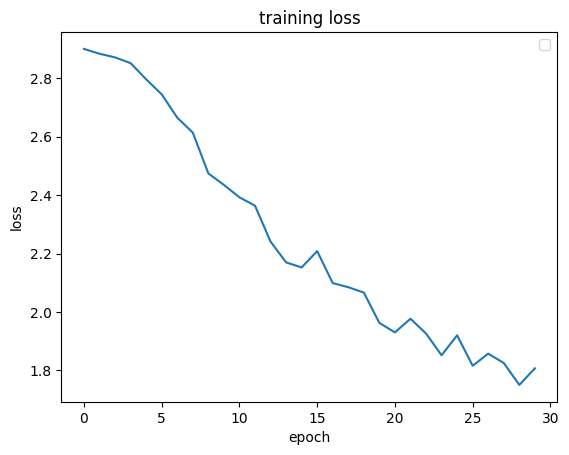

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.legend()
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [9]:
#testing the model
test_loss,test_acc=model.evaluate(test)
print('test accuracy:',test_acc*100,"%")
print('test loss:',test_loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5549 - loss: 1.6084 
test accuracy: 52.77777910232544 %
test loss: 1.623706579208374
